### Student Activity: Returns Over Date Ranges

This program reads daily stock data from a CSV, trims extraneous columns, converts date strings to datetime objects, sets the datetimes as the index, and calculates and plots returns for specified date ranges.


In [4]:
# Import libraries and dependencies
from pathlib import Path
import pandas as pd
%matplotlib inline

### Read CSV in as DataFrame

In [5]:
# Set the path
csvpath = Path('../Resources/amd_stock_data.csv')

# Read in the CSV as a DataFrame
df = pd.read_csv(csvpath)
df.head()

,date,close,volume,open,high,low
0,4/29/09,3.51,11537950,3.40,3.56,3.38
1,4/30/09,3.61,18193730,3.55,3.73,3.53
2,5/1/09,3.82,16233940,3.55,3.90,3.55
3,5/4/09,4.26,21236940,3.90,4.30,3.83
4,5/5/09,4.32,16369170,4.36,4.39,4.11


### View Summary Statistics

In [7]:
# Output summary statistics for csv data
df.describe()

,close,volume,open,high,low
count,2517.000000,2.517000e+03,2517.000000,2517.000000,2517.000000
mean,7.561573,3.535586e+07,7.564402,7.727118,7.393507
std,5.814291,3.357519e+07,5.816548,5.961393,5.660075
min,1.620000,2.606577e+06,1.620000,1.690000,1.610000
25%,3.610000,1.467149e+07,3.615000,3.680000,3.540000
50%,5.950000,2.372014e+07,5.930000,6.090000,5.790000
75%,9.450000,4.286763e+07,9.450000,9.590000,9.260000
max,32.720000,3.238445e+08,33.180000,34.140000,32.190000


### Drop Extra Columns


In [8]:
# Drop unnecessary columns
df = df.drop(columns=['volume', 'open', 'high', 'low'])
df.head()

,date,close
0,4/29/09,3.51
1,4/30/09,3.61
2,5/1/09,3.82
3,5/4/09,4.26
4,5/5/09,4.32


### Set Date as Index


In [11]:
# Set the date as the index to the DataFrame
df.set_index(pd.to_datetime(df['date'], infer_datetime_format=True), inplace=True)
df.head()

,date,close
date,,
2009-04-29,4/29/09,3.51
2009-04-30,4/30/09,3.61
2009-05-01,5/1/09,3.82
2009-05-04,5/4/09,4.26
2009-05-05,5/5/09,4.32


### Drop Extra Date Column

In [13]:
# Drop the extra date column
df = df.drop(columns='date')
df.head()

,close
date,
2009-04-29,3.51
2009-04-30,3.61
2009-05-01,3.82
2009-05-04,4.26
2009-05-05,4.32


### Calculate Daily Returns


In [14]:
# Calculate the daily return over the last 10 years
daily_return = df.pct_change()
daily_return.head()

,close
date,
2009-04-29,NaN
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085


### Use Indexing to Create Date Ranges


In [19]:
# Slice DataFrame into 1 year timeframe
return_1year = daily_return.loc['2009-04-29':'2010-04-29', :]
return_1year

# Slice DataFrame into 3 year timeframe
return_3year = daily_return.loc['2009-04-29':'2012-04-29', :]
return_3year

# Slice DataFrame into 5 year timeframe
return_5year = daily_return.loc['2009-04-29':'2014-04-29', :]

# Slice DataFrame into 10 year timeframe
return_10year = daily_return.loc['2009-04-29':'2019-04-29', :]
return_10year

,close
date,
2009-04-29,NaN
2009-04-30,0.028490
2009-05-01,0.058172
2009-05-04,0.115183
2009-05-05,0.014085
...,...
2019-04-23,-0.007452
2019-04-24,0.017519
2019-04-25,-0.028110


### Output Summary Statistics for 1 Year of Daily Returns 


In [20]:
# Display summary statistics for 1 year of AMD stock data
return_1year.describe()

,close
count,252.000000
mean,0.004743
std,0.037651
min,-0.129902
25%,-0.015023
50%,0.002767
75%,0.023546
max,0.218045


### Output Summary Statistics for 3 Years of Daily Returns 


In [21]:
# Display summary statistics for 3 years of AMD stock data
return_3year.describe()

,close
count,756.000000
mean,0.001528
std,0.033454
min,-0.136585
25%,-0.017782
50%,0.000000
75%,0.018959
max,0.218045


### Output Summary Statistics for 5 Years of Daily Returns

In [22]:
# Display summary statistics for 5 years of AMD stock data
return_5year.describe()

,close
count,1258.000000
mean,0.000673
std,0.033559
min,-0.167939
25%,-0.017289
50%,0.000000
75%,0.017843
max,0.218045


### Output Summary Statistics for 10 Years of Daily Returns 

In [23]:
# Display summary statistics for 10 years of AMD stock data
return_10year.describe()

,close
count,2516.000000
mean,0.001488
std,0.036897
min,-0.242291
25%,-0.016844
50%,0.000000
75%,0.018524
max,0.522901


### Plot 1 Year of Daily Returns 

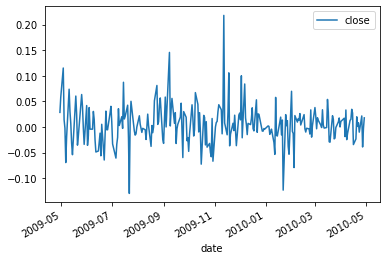

In [25]:
# Display chart of 1 year's worth of daily AMD returns
return_1year.plot()

### Plot 3 Years of Daily Returns

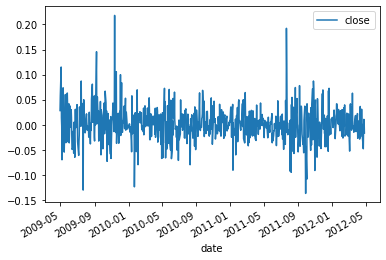

In [26]:
# Display chart of 3 year's worth of daily AMD returns
return_3year.plot()

### Plot 5 Years of Daily Returns

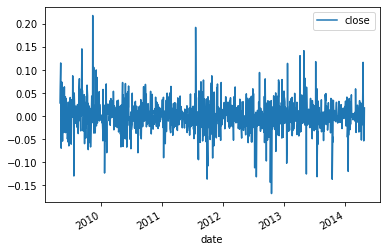

In [27]:
# Display chart of 5 year's worth of daily AMD returns
return_5year.plot()

### Plot 10 Years of Daily Returns

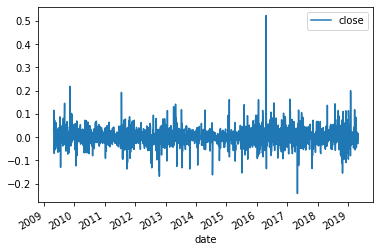

In [28]:
# Display chart of 10 year's worth of daily AMD returns
return_10year.plot()

### Analyze Daily Returns over Date Ranges

1. What are the average daily returns over each date range?

    * 1 Year = 0.47%
    * 3 Year = 0.15%
    * 5 Year = 0.07%
    * 10 Year = 0.15%
    
    
2. What insights could this provide in regards to wanting to trade AMD stock in the long-term vs. short-term? 
   We need to check out the standard deviation for each periods.
               mean       std
    * 1 Year = 0.47%      3.77%
    * 3 Year = 0.15%      3.35%
    * 5 Year = 0.07%      3.36%
    * 10 Year = 0.15%     3.69%
    
    We can observe that the sharpe ratio of 1 year return is greater than that of others. Moreover, 3 year return is also greater than 5 yr and 10 yr in terms of sharpe ratio.
    As a result, we consider short-term trading is more rewarded than long-term. 
